## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
studyData = pd.merge(study_results, mouse_metadata, how="outer", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
studyData.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [2]:
# Check the number of mice.
len(studyData["Mouse ID"].unique())


249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = studyData[studyData.duplicated(['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupMouse = studyData.loc[studyData['Mouse ID'] == 'g989']
dupMouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
studyData = studyData.drop(studyData[studyData['Mouse ID'] == 'g989'].index)

In [6]:
# Check the number of mice in the clean DataFrame.
len(studyData["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
#create the groupby
studyGroup = studyData.groupby('Drug Regimen')

#perform each calculation
studyMean = studyGroup['Tumor Volume (mm3)'].mean()
studyMedian = studyGroup['Tumor Volume (mm3)'].median()
studyVar = studyGroup['Tumor Volume (mm3)'].var()
studyStd = studyGroup['Tumor Volume (mm3)'].std()
studySEM = studyGroup['Tumor Volume (mm3)'].sem()

#combine the series
summary = pd.concat([studyMean, studyMedian, studyVar, studyStd, studySEM], axis=1)

#rename the columns
summary.columns.values[0] = 'Mean'
summary.columns.values[1] = 'Median'
summary.columns.values[2] = 'Variance'
summary.columns.values[3] = 'Standard Deviation'
summary.columns.values[4] = 'SEM'

#print the dataframe
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)
summary2 = studyData.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 
                                                                       'median', 
                                                                       'var', 
                                                                       'std', 
                                                                       'sem']})
summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

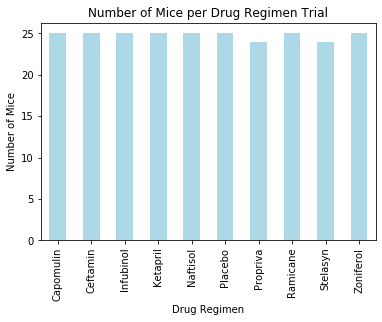

In [49]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 
#filter the dataframe to only contain unique mice
uniqueMice = studyData.drop_duplicates(subset = ['Mouse ID'], keep='first')

#create the series of mice per trial
DrugGroup = uniqueMice.groupby(uniqueMice['Drug Regimen'])
miceRegimen = DrugGroup['Mouse ID'].count()

miceRegimen.plot.bar('Drug Regimen', 'Mouse ID', rot=90, color='lightblue')
plt.ylabel('Number of Mice')
plt.title('Number of Mice per Drug Regimen Trial')
plt.show()
## Note: this plot will be identical to the one that uses Pyplot

In [34]:
#convert MiceRegimen to a dataframe
miceRegimen_df = miceRegimen.to_frame()
# miceRegimen_df
#pull two lists for the pyplot graph out of the miceRegimen dataframe
x_axis = miceRegimen_df.index
y_axis = miceRegimen_df['Mouse ID'].to_list()
x_axis


Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

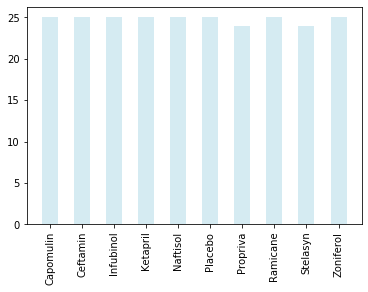

In [50]:

##  Note: this plot will be identical to the one that uses Pandas
plt.bar(x_axis, y_axis, color='lightblue', alpha=0.5, align='center', width = .5)
tick_locations = [value for value in x_axis]
plt.xticks(rotation=90)
# plt.ylabel('Number of Mice')
# plt.title('Number of Mice per Drug Regimen Trial')
# plt.show()

In [ ]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
GenderGroup = uniqueMice.groupby(uniqueMice['Sex'])
mouseGender = GenderGroup['Mouse ID'].count()
mouseGender.plot.pie(y='Sex', figsize=(5,5))
plt.ylabel('Number of Mice')
plt.title('Gender Distribution of Mice')
plt.show()
## Note: this plot will be identical to the one that uses Pyplot

In [ ]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice


##  Note: this plot will be identical to the one that uses Pandas
mouseGender.pie()

plt.ylabel('Number of Mice')
plt.title('Gender Distribution of Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
